In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Morphological Operators

In [2]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

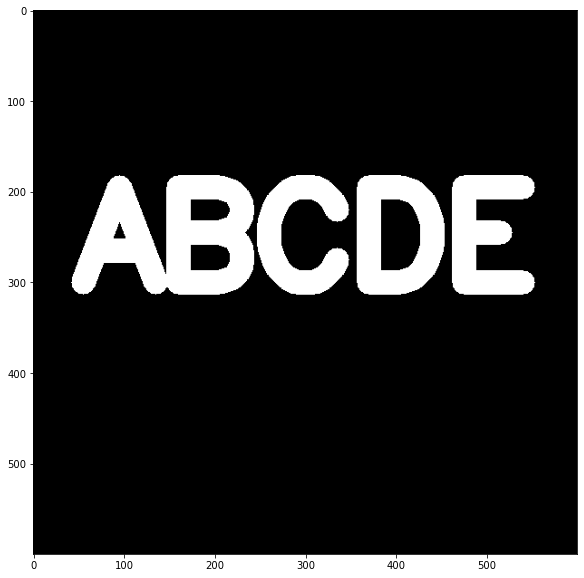

In [10]:
img = load_img()
display_img(img)

## Erosion

In [11]:
kernel = np.ones((5,5),dtype=np.uint8)

In [12]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [17]:
rs = cv2.erode(img,kernel,iterations=1)


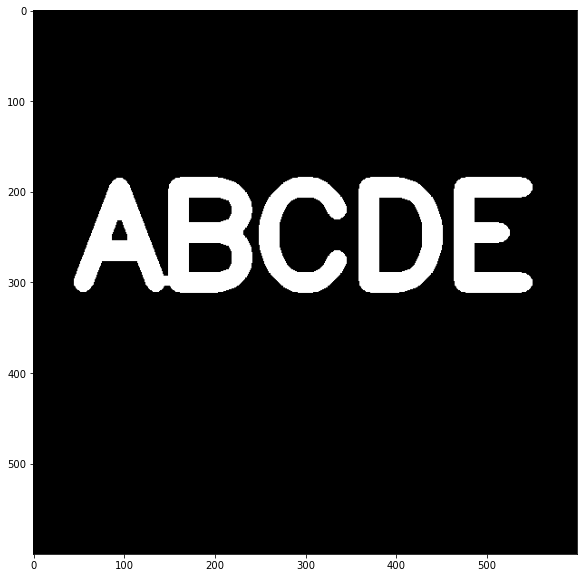

In [18]:
display_img(rs)

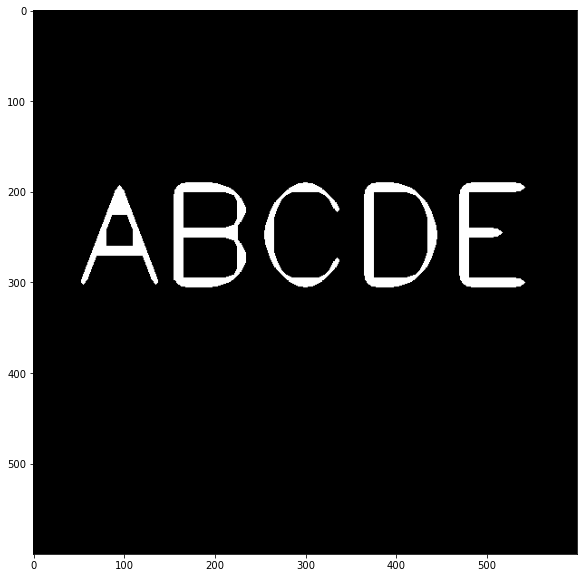

In [19]:
rs5 = cv2.erode(img,kernel,iterations=4)
display_img(rs5)

## Opening
Opening is erosion followed by dilation. Useful in removing background noise!

In [20]:
img = load_img()

In [22]:
white_noise = np.random.randint(low=0, high=2,size=(600,600))

In [23]:
white_noise

array([[1, 1, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 0, 1]])

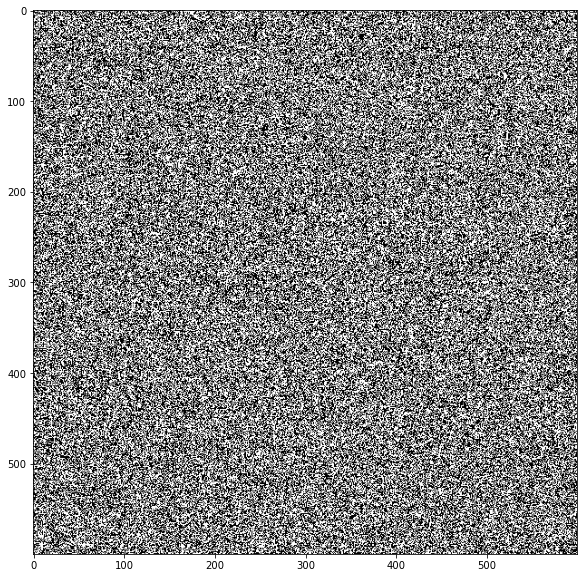

In [24]:
display_img(white_noise)

In [25]:
img.max()

255.0

In [26]:
white_noise = white_noise *255


In [27]:
white_noise

array([[255, 255, 255, ...,   0, 255,   0],
       [  0,   0, 255, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255,   0, ...,   0,   0, 255],
       [  0,   0, 255, ..., 255, 255,   0],
       [255,   0, 255, ...,   0,   0, 255]])

In [28]:
noise_img = white_noise + img

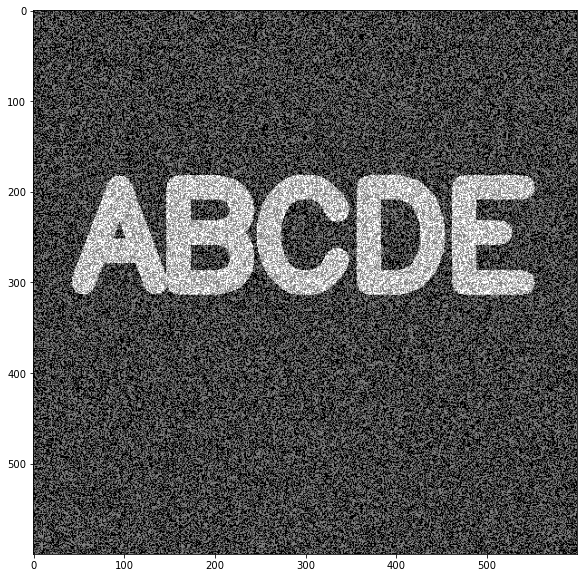

In [29]:
display_img(noise_img)

In [30]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

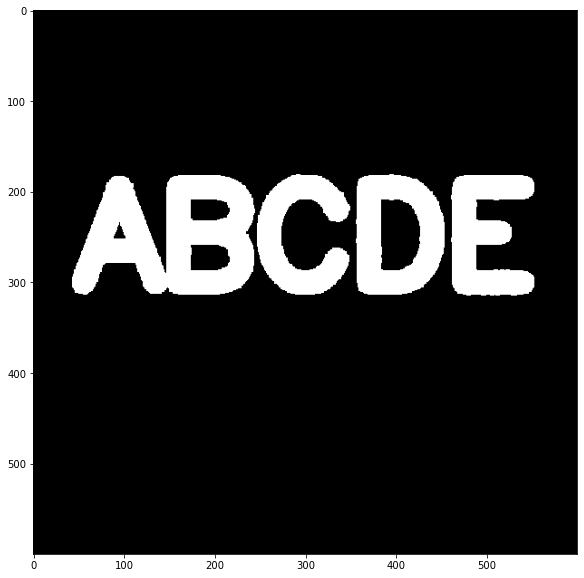

In [31]:
display_img(opening)

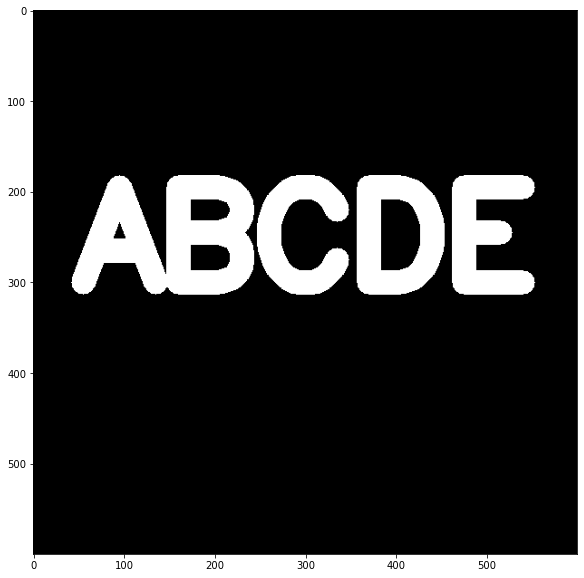

In [32]:
display_img(img)

### Closing
 Useful in removing noise from foreground objects, such as black dots on top of the white text.

In [33]:
img = load_img()

In [34]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 1, 1]])

In [35]:
black_noise = black_noise * -255

In [36]:
black_noise_img = img + black_noise

In [39]:
black_noise_img

array([[   0., -255.,    0., ..., -255.,    0.,    0.],
       [   0., -255.,    0., ...,    0., -255.,    0.],
       [   0., -255.,    0., ...,    0., -255.,    0.],
       ...,
       [   0., -255., -255., ...,    0.,    0.,    0.],
       [-255., -255., -255., ...,    0., -255.,    0.],
       [-255.,    0., -255., ..., -255., -255., -255.]])

In [40]:
black_noise_img[black_noise_img== -255] = 0

In [41]:
black_noise_img.min()

0.0

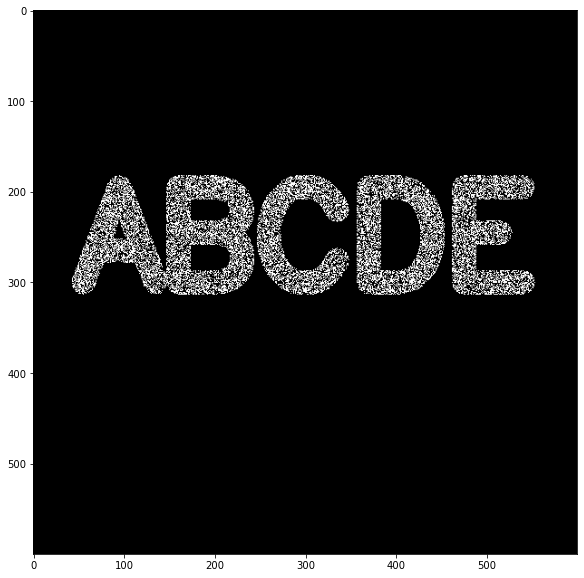

In [42]:
display_img(black_noise_img)

In [43]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

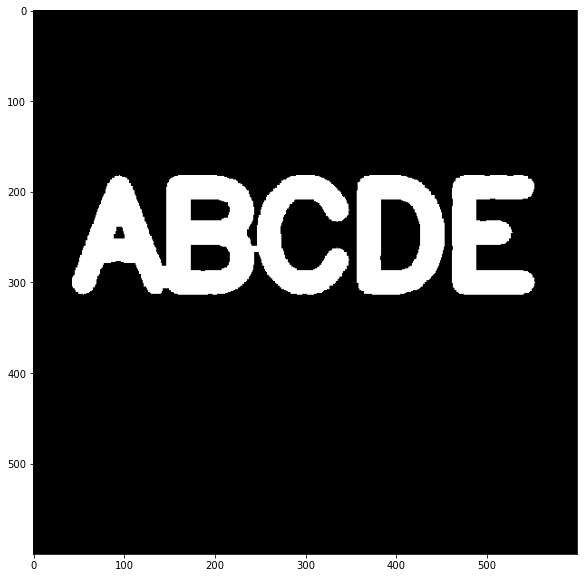

In [44]:
display_img(closing)

## Morphological Gradient

Difference between dilation and erosion of an image.

In [45]:
img = load_img()

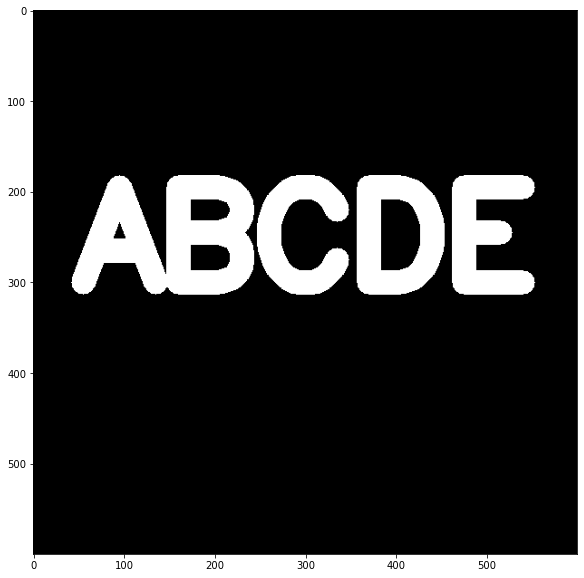

In [46]:
display_img(img)

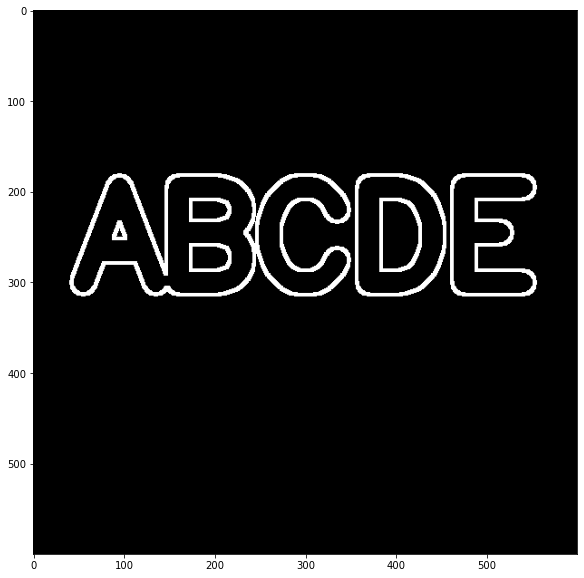

In [47]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT, kernel)
display_img(gradient)